<a href="https://colab.research.google.com/github/apollman/infm-456/blob/main/Final_Pres/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
compwh = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sp500_companies.csv", header= None, engine='python' )
compwh = compwh.iloc[1: , :]

c_headers=["Exchange", "Symbol", "Shortname", "Longname", "Sector", "Industry",
       "Currentprice", "Marketcap", "Ebitda", "Revenuegrowth", "City", "State",
      "Country", "Fulltimeemployees", "Longbusinesssummary", "Weight"]

compwh.columns= c_headers

In [ ]:
to_drop = ['Marketcap', 'Ebitda', 'Revenuegrowth', 
           'City', 'State', 'Country', 
           'Fulltimeemployees', 'Weight', 'Currentprice', 
           'Longbusinesssummary']
compwh.drop(to_drop, inplace=True, axis=1)
compwh.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information
5,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail


In [ ]:
stckwh = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sp500_stocks.csv", header= None, engine='python')
stckwh = stckwh.iloc[1: , :]
s_headers = ['Date', 'Symbol', 'Adj_Close', 'Close', 'High', 'Low', 'Open',
       'Volume']
stckwh.columns = s_headers
stckwh = stckwh[stckwh.Date >= '2018-03-01']

In [ ]:
merged_data = stckwh.merge(compwh,on=["Symbol"])
merged_data.head()

,Date,Symbol,Adj_Close,Close,High,Low,Open,Volume,Exchange,Shortname,Longname,Sector,Industry
0,2018-03-01,MMM,204.9241943359375,231.33999633789062,236.8300018310547,229.52999877929688,236.14999389648438,3487100.0,NYQ,3M Company,3M Company,Industrials,Conglomerates
1,2018-03-02,MMM,204.06497192382812,230.3699951171875,231.27000427246094,226.3300018310547,229.75,2912800.0,NYQ,3M Company,3M Company,Industrials,Conglomerates
2,2018-03-05,MMM,206.22637939453125,232.80999755859375,233.7100067138672,228.52999877929688,230.0,2235300.0,NYQ,3M Company,3M Company,Industrials,Conglomerates
3,2018-03-06,MMM,206.9793243408203,233.66000366210938,235.9199981689453,230.8000030517578,234.0500030517578,2091100.0,NYQ,3M Company,3M Company,Industrials,Conglomerates
4,2018-03-07,MMM,208.6712188720703,235.57000732421875,236.22000122070312,230.58999633789062,231.22000122070312,2213800.0,NYQ,3M Company,3M Company,Industrials,Conglomerates


In [ ]:
merged_data["Adj_Close"] = merged_data["Adj_Close"].astype(str).astype(float)
merged_data["Volume"] = merged_data["Volume"].astype(str).astype(float)
merged_data["Close"] = merged_data["Close"].astype(str).astype(float)
merged_data["High"] = merged_data["High"].astype(str).astype(float)
merged_data["Low"] = merged_data["Low"].astype(str).astype(float)
merged_data["Open"] = merged_data["Open"].astype(str).astype(float)

In [ ]:
#Changing NaN Values to O
merged_data["Adj_Close"]=merged_data["Adj_Close"].fillna(0)
#Removing NaN Values
dropvalue=merged_data[merged_data["Adj_Close"]== 0]
merged_data.drop(dropvalue.index,axis=0,inplace=True)

In [ ]:
merged_data = merged_data.dropna()
merged_data['Date'] = merged_data['Date'].astype('datetime64[ns]')

In [ ]:
aapl = merged_data[merged_data.Symbol == 'AAPL']

In [ ]:
aapl['returns'] = np.log(aapl.Close.pct_change() + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def lagit(df, lags):
    names = []
    for i in range(1, lags +1):
      df['Lag_' + str(i)] = df['returns'].shift(i)
      names.append('Lag_'+str(i))
    return names


In [ ]:
lagnames = lagit(aapl, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

In [ ]:
aapl.head()

,Date,Symbol,Adj_Close,Close,High,Low,Open,Volume,Exchange,Shortname,Longname,Sector,Industry,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
43296,2018-03-01,AAPL,42.138268,43.750000,44.945000,43.165001,44.634998,195208000.0,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,NaN,NaN,NaN,NaN,NaN,NaN
43297,2018-03-02,AAPL,42.429626,44.052502,44.075001,43.112499,43.200001,153816000.0,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,0.006891,NaN,NaN,NaN,NaN,NaN
43298,2018-03-05,AAPL,42.576511,44.205002,44.435001,43.630001,43.802502,113605600.0,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,0.003456,0.006891,NaN,NaN,NaN,NaN
43299,2018-03-06,AAPL,42.540394,44.167500,44.562500,44.032501,44.477501,95154000.0,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,-0.000849,0.003456,0.006891,NaN,NaN,NaN
43300,2018-03-07,AAPL,42.145489,43.757500,43.962502,43.567501,43.735001,126814000.0,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,-0.009326,-0.000849,0.003456,0.006891,NaN,NaN


In [ ]:
aapl.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(aapl[lagnames], aapl['returns'])

LinearRegression()

In [ ]:
aapl['prediction_LR'] = model.predict(aapl[lagnames])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
aapl.head()

,Date,Symbol,Adj_Close,Close,High,Low,Open,Volume,Exchange,Shortname,Longname,Sector,Industry,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR
43302,2018-03-09,AAPL,43.337402,44.994999,45.000000,44.347500,44.490002,128740800.0,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,0.017035,0.010853,-0.009326,-0.000849,0.003456,0.006891,0.000017
43303,2018-03-12,AAPL,43.756374,45.430000,45.597500,45.052502,45.072498,128828400.0,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,0.009621,0.017035,0.010853,-0.009326,-0.000849,0.003456,-0.000362
43304,2018-03-13,AAPL,43.334995,44.992500,45.875000,44.810001,45.647499,126774000.0,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,-0.009677,0.009621,0.017035,0.010853,-0.009326,-0.000849,0.000378
43305,2018-03-14,AAPL,42.966583,44.610001,45.130001,44.452499,45.080002,117473600.0,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,-0.008538,-0.009677,0.009621,0.017035,0.010853,-0.009326,0.002206
43306,2018-03-15,AAPL,43.017151,44.662498,45.060001,44.517502,44.625000,90975200.0,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,0.001176,-0.008538,-0.009677,0.009621,0.017035,0.010853,0.002508


In [ ]:
aapl['direction_LR'] = [1 if i > 0 else -1 for i in aapl.prediction_LR]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
aapl['strat_LR'] = aapl['direction_LR'] * aapl['returns']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
np.exp(aapl[['returns','strat_LR']].sum())

returns     3.653668
strat_LR    3.408414
dtype: float64

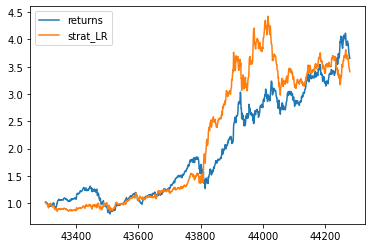

In [ ]:
np.exp(aapl[['returns','strat_LR']].cumsum()).plot()

In [ ]:
print(merged_data.dtypes)

Date         datetime64[ns]
Symbol               object
Adj_Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume              float64
Exchange             object
Shortname            object
Longname             object
Sector               object
Industry             object
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,test = train_test_split(aapl, shuffle = False,
                              test_size = 0.3, random_state = 0)

In [ ]:
train = train.copy()
test = test.copy()

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(train[lagnames], train['returns'])

LinearRegression()

In [ ]:
test['prediction_LR'] = model.predict(test[lagnames])

In [ ]:
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

In [ ]:
test['strat_LR'] = test['direction_LR'] * test['returns']

In [ ]:
np.exp(test[['returns','strat_LR']].sum())

returns     1.377365
strat_LR    1.052226
dtype: float64

In [ ]:
(test['direction_LR'].diff() != 0).value_counts()

False    157
True     137
Name: direction_LR, dtype: int64

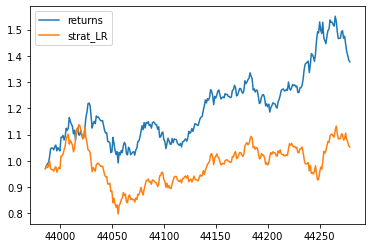

In [ ]:
p1 = np.exp(test[['returns','strat_LR']].cumsum())
p1.plot()
plt.show()